In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')


In [37]:
df = pd.read_csv("earthquake.csv")

### Data Understanding

In [38]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-26T09:21:07.870Z,39.302166,-123.230003,6.380000,1.41,md,8.0,98.000000,0.106500,0.010000,...,2025-11-26T09:22:43.878Z,"5 km NNW of Redwood Valley, CA",earthquake,0.430000,1.720000,0.09000,6.0,automatic,nc,nc
1,2025-11-26T09:20:52.974Z,34.300488,-97.587502,4.109524,2.09,ml,18.0,153.581558,0.113452,0.859261,...,2025-11-26T09:23:27.885Z,"9 km ESE of Loco, Oklahoma",earthquake,3.869615,2.157297,0.33000,8.0,automatic,ok,ok
2,2025-11-26T09:16:31.630Z,19.162167,-155.374329,-0.570000,1.85,md,37.0,177.000000,0.078070,0.320000,...,2025-11-26T09:21:17.020Z,"11 km ESE of Pāhala, Hawaii",earthquake,0.910000,0.250000,0.14556,9.0,automatic,hv,hv
3,2025-11-26T09:14:51.192Z,35.315437,-97.941772,7.483082,1.84,ml,13.0,67.599908,0.077673,0.709821,...,2025-11-26T09:17:00.784Z,"0 km NE of Minco, Oklahoma",earthquake,3.925934,6.247273,0.29000,12.0,automatic,ok,ok
4,2025-11-26T09:12:21.780Z,37.751335,-121.938499,4.760000,1.06,md,8.0,86.000000,0.035640,0.080000,...,2025-11-26T09:15:08.083Z,"5 km SE of San Ramon, CA",earthquake,0.500000,0.890000,0.18000,6.0,automatic,nc,nc


In [39]:
df.shape

(8168, 22)

In [40]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8163    False
8164    False
8165    False
8166    False
8167    False
Length: 8168, dtype: bool

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8168 non-null   object 
 1   latitude         8168 non-null   float64
 2   longitude        8168 non-null   float64
 3   depth            8168 non-null   float64
 4   mag              8168 non-null   float64
 5   magType          8168 non-null   object 
 6   nst              7286 non-null   float64
 7   gap              7284 non-null   float64
 8   dmin             7284 non-null   float64
 9   rms              8168 non-null   float64
 10  net              8168 non-null   object 
 11  id               8168 non-null   object 
 12  updated          8168 non-null   object 
 13  place            8168 non-null   object 
 14  type             8168 non-null   object 
 15  horizontalError  7006 non-null   float64
 16  depthError       8126 non-null   float64
 17  magError      

In [42]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8168.000000,8168.000000,8168.000000,8168.000000,7286.000000,7284.000000,7284.000000,8168.000000,7006.000000,8126.000000,7260.000000,7286.000000
mean,40.156562,-107.813241,20.708148,1.638722,26.200659,105.579025,0.462828,0.290341,1.613352,2.342226,0.189819,19.151935
std,17.946593,72.201767,52.331787,1.296144,24.886887,61.673873,1.711514,0.300358,3.112076,6.537074,0.122627,32.185049
min,-61.189500,-179.956700,-3.390000,-1.420000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.464125,-149.931900,2.990000,0.820000,10.000000,62.000000,0.015460,0.100000,0.230000,0.480000,0.106320,6.000000
50%,38.812833,-122.110667,7.300000,1.400000,19.000000,88.000000,0.052105,0.170000,0.390000,0.800000,0.168659,11.000000
75%,54.680208,-110.838500,13.802500,2.000000,34.000000,133.000000,0.156327,0.420000,0.880000,1.891750,0.232358,21.000000
max,73.243500,179.972300,669.556000,6.800000,327.000000,348.000000,49.594000,3.694054,26.780000,252.700000,1.450000,972.000000


# Data Cleaning

In [43]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                 882
gap                 884
dmin                884
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1162
depthError           42
magError            908
magNst              882
status                0
locationSource        0
magSource             0
dtype: int64

In [44]:
categorical = df.select_dtypes(include='object').columns

In [45]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns


In [46]:
round((df.isnull().sum()/len(df))*100),2 # Missing Percentage

(time                0.0
 latitude            0.0
 longitude           0.0
 depth               0.0
 mag                 0.0
 magType             0.0
 nst                11.0
 gap                11.0
 dmin               11.0
 rms                 0.0
 net                 0.0
 id                  0.0
 updated             0.0
 place               0.0
 type                0.0
 horizontalError    14.0
 depthError          1.0
 magError           11.0
 magNst             11.0
 status              0.0
 locationSource      0.0
 magSource           0.0
 dtype: float64,
 2)

In [47]:
numerical_cols =df.describe().columns
for col in numerical_cols:
    skew_val = df[col].skew()
    print(f"{col}: skew={skew_val:.2f}")

# skew ≈ 0 → symmetric → fill with mean
# skew > 0 or < 0 → skewed → fill with median

latitude: skew=-1.65
longitude: skew=2.80
depth: skew=7.36
mag: skew=1.11
nst: skew=3.21
gap: skew=1.29
dmin: skew=12.42
rms: skew=1.65
horizontalError: skew=2.70
depthError: skew=17.47
magError: skew=2.44
magNst: skew=10.35


In [48]:
for col in numerical_cols:
    if df[col].skew()<0.5:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col]=df[col].fillna(df[col].median())

In [49]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

# Data Preprocessing

In [50]:
df[['time','updated']].isnull().sum()

time       0
updated    0
dtype: int64

In [51]:
df[['time','updated']].isna().sum() # in object  isnull and isnan different sometime  

time       0
updated    0
dtype: int64

In [52]:
df['time']=df['time'].replace(['', 'NaN', 'nan', None],np.nan)

In [53]:
df['time']=pd.DataFrame(df['time'])

In [54]:
df['time']=pd.to_datetime(df['time'],errors='coerce')

In [55]:
df['updated']=pd.to_datetime(df['updated'],errors='coerce')

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             8168 non-null   datetime64[ns, UTC]
 1   latitude         8168 non-null   float64            
 2   longitude        8168 non-null   float64            
 3   depth            8168 non-null   float64            
 4   mag              8168 non-null   float64            
 5   magType          8168 non-null   object             
 6   nst              8168 non-null   float64            
 7   gap              8168 non-null   float64            
 8   dmin             8168 non-null   float64            
 9   rms              8168 non-null   float64            
 10  net              8168 non-null   object             
 11  id               8168 non-null   object             
 12  updated          8168 non-null   datetime64[ns, UTC]
 13  place            8

In [57]:
df[['time','updated']].isna().sum()

time       0
updated    0
dtype: int64

In [58]:
df['time_year'] = df['time'].dt.year
print(df['time_year'])

0       2025
1       2025
2       2025
3       2025
4       2025
        ... 
8163    2025
8164    2025
8165    2025
8166    2025
8167    2025
Name: time_year, Length: 8168, dtype: int32


# EDA

In [59]:
# plt.Figure(figsize=(12,8))
# for col in numerical_cols:
#     plt.hist(df[col],bins=5, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('frequency')
#     plt.show()
    

### Univariate Analysis

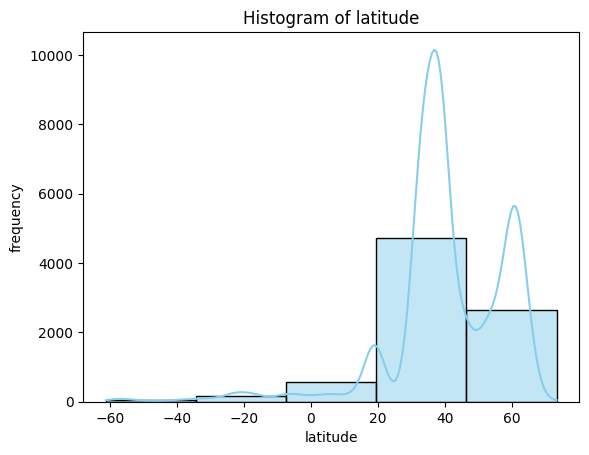

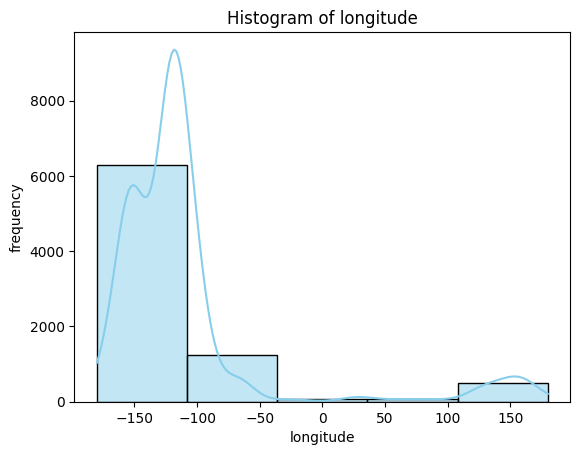

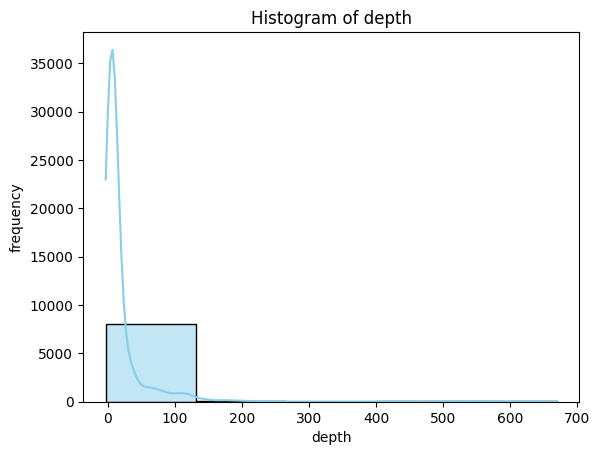

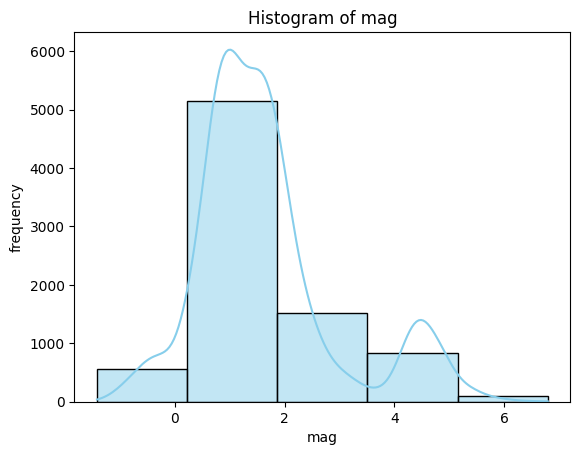

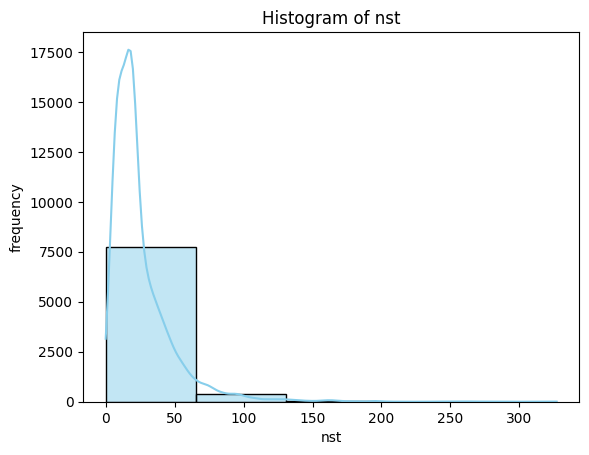

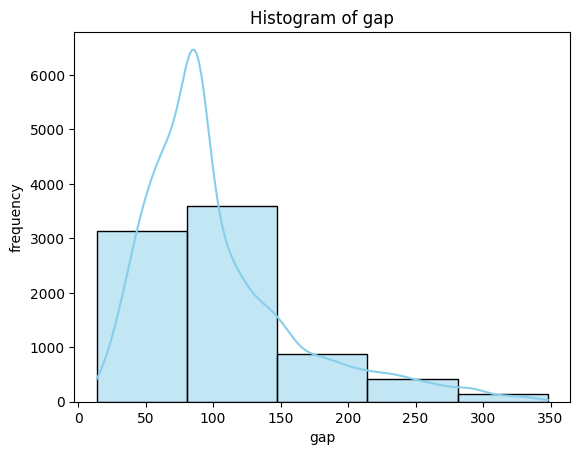

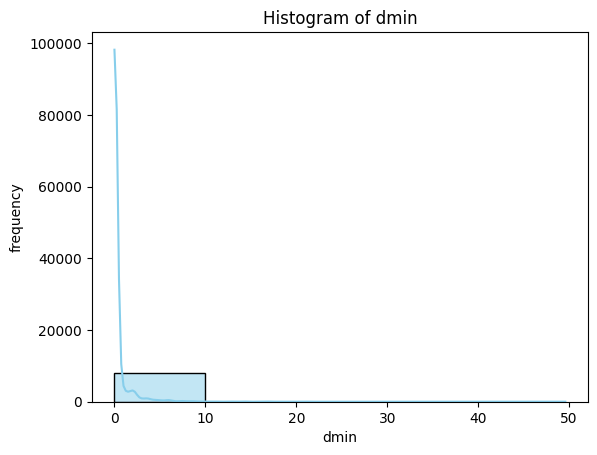

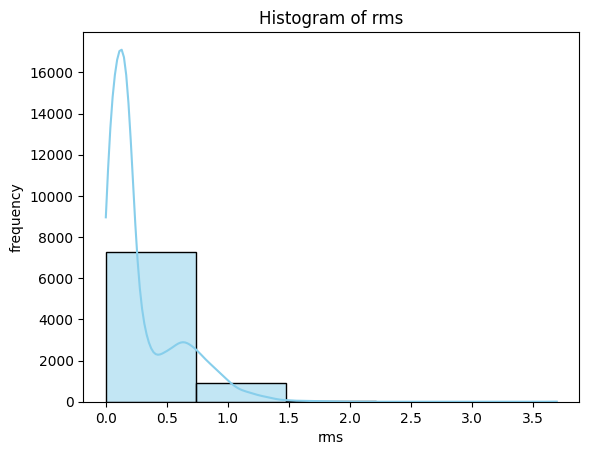

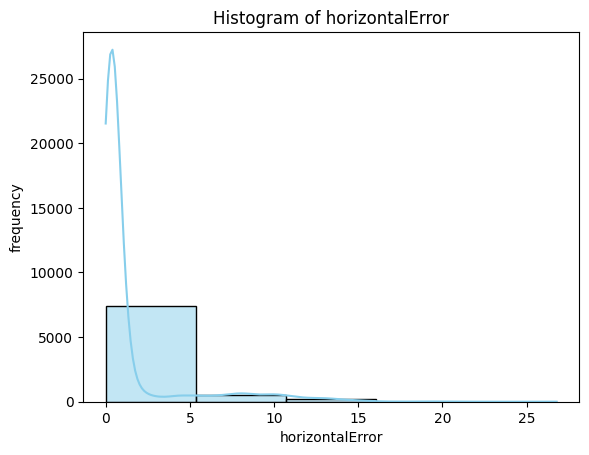

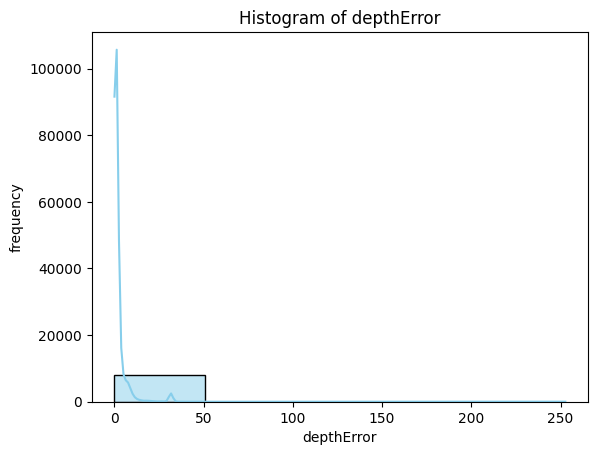

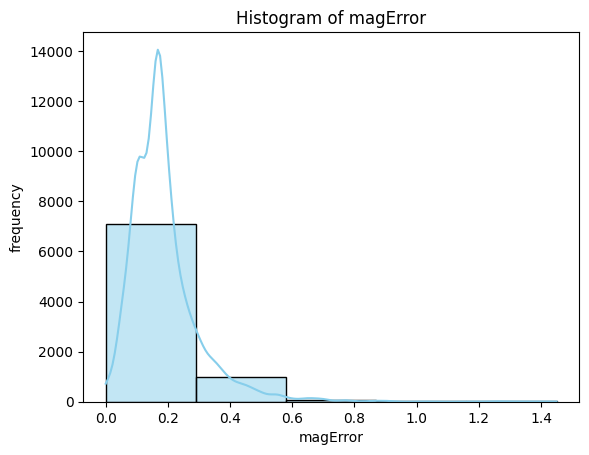

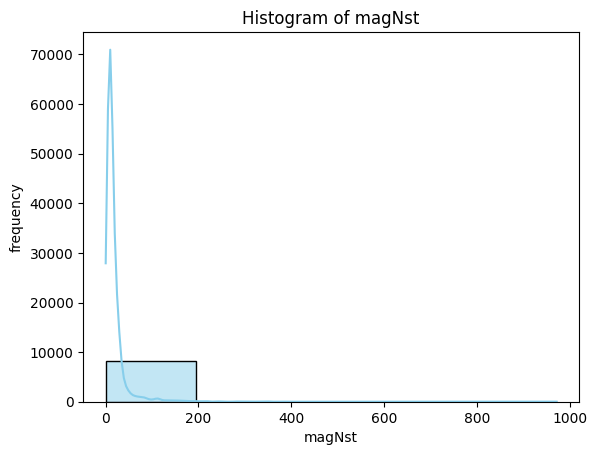

In [60]:
#Numerical Columns

plt.Figure(figsize=(12,8))
for col in numerical:
    sns.histplot(df[col],bins=5, color='skyblue', edgecolor='black',kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

<Figure size 1200x800 with 0 Axes>

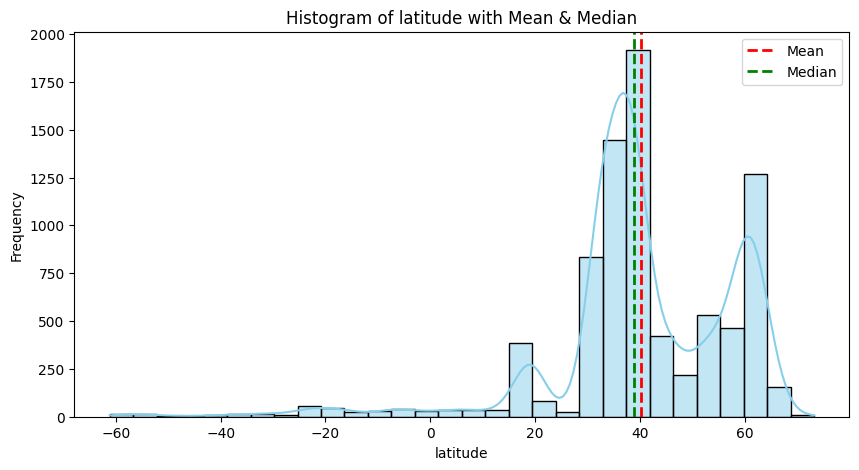

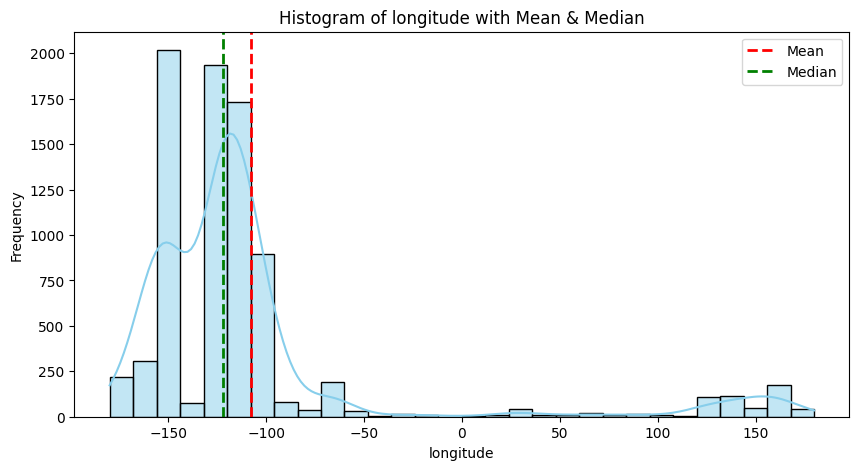

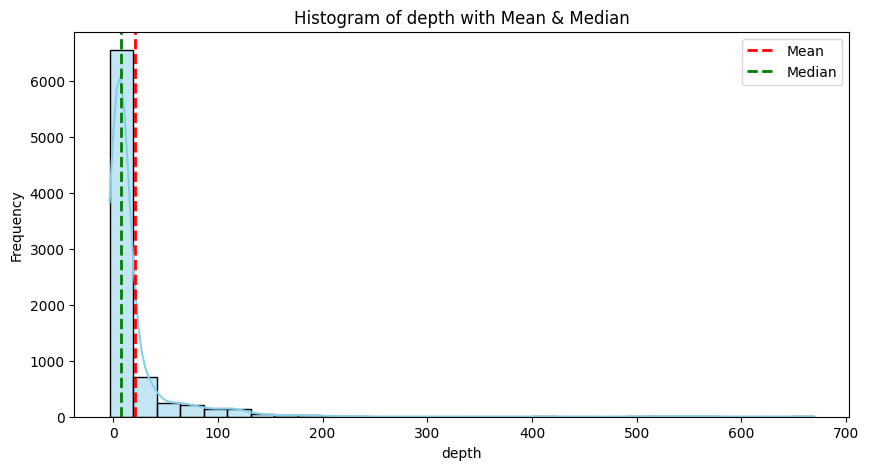

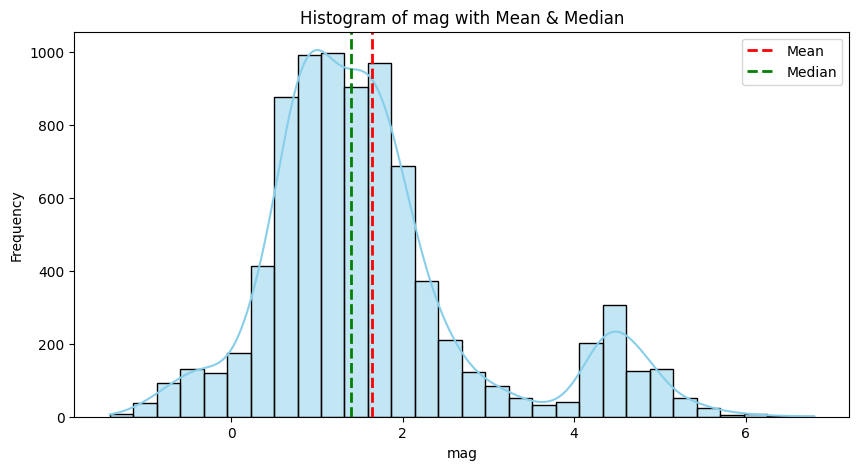

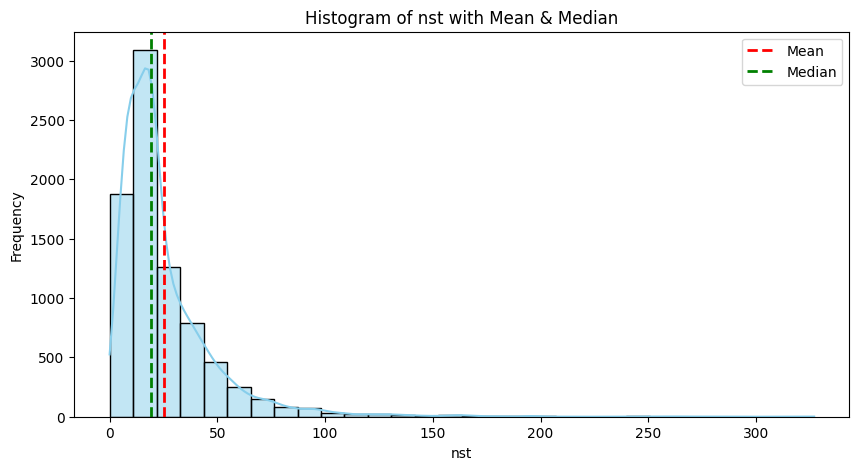

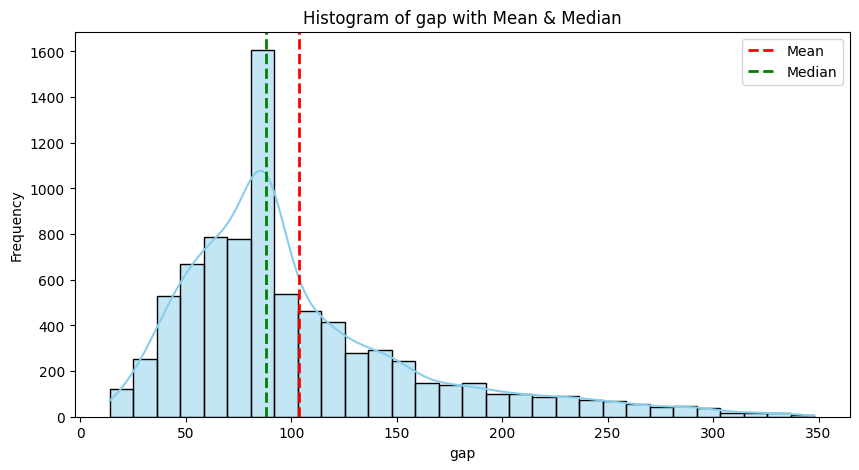

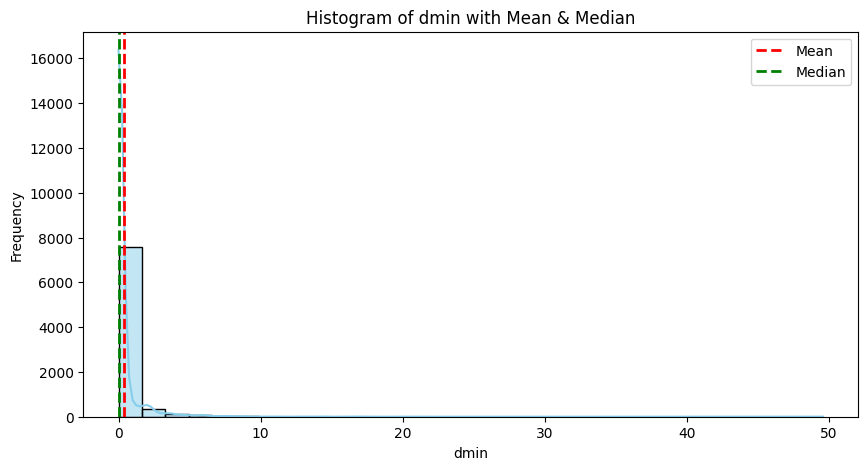

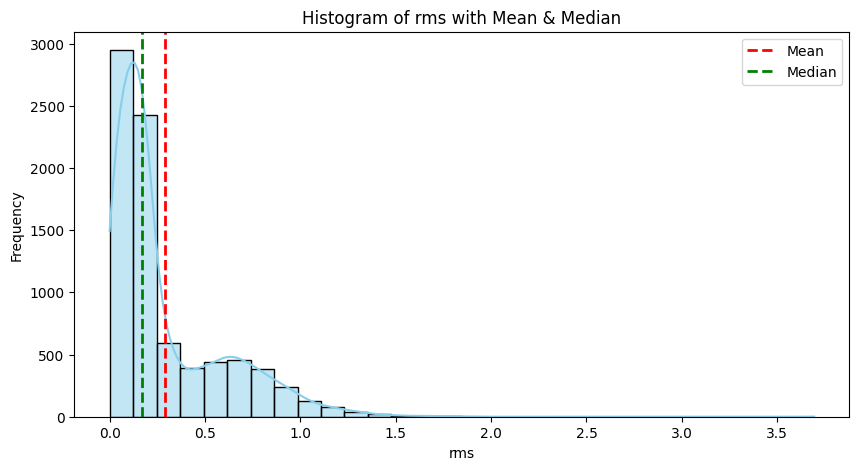

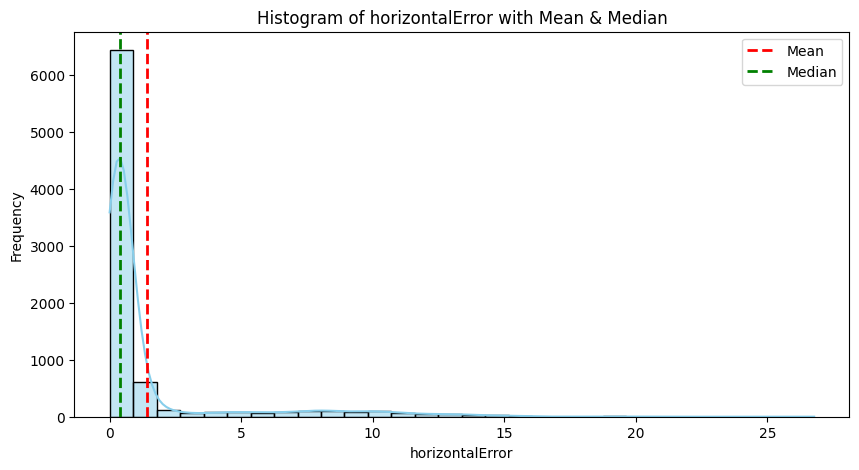

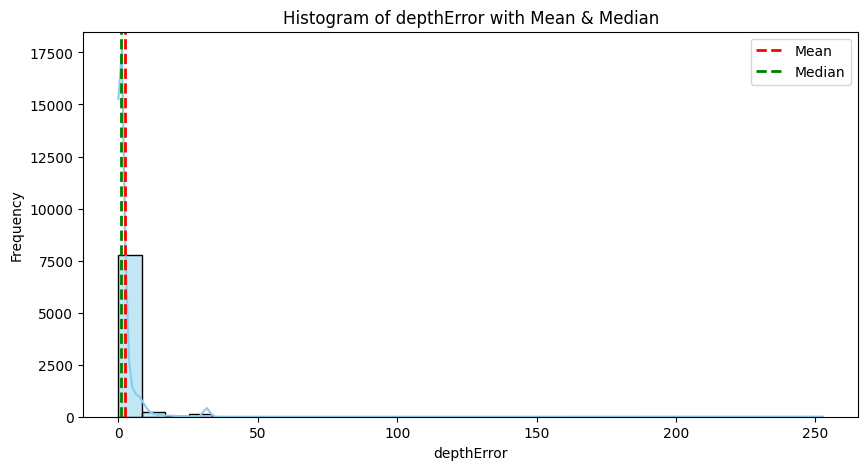

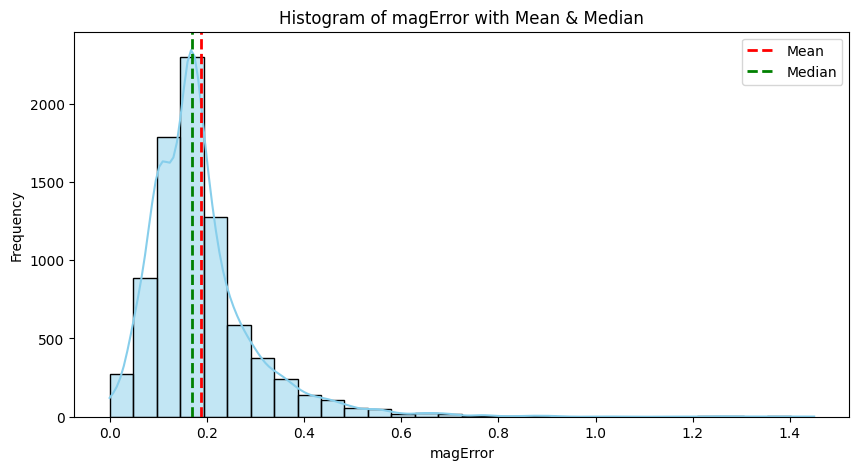

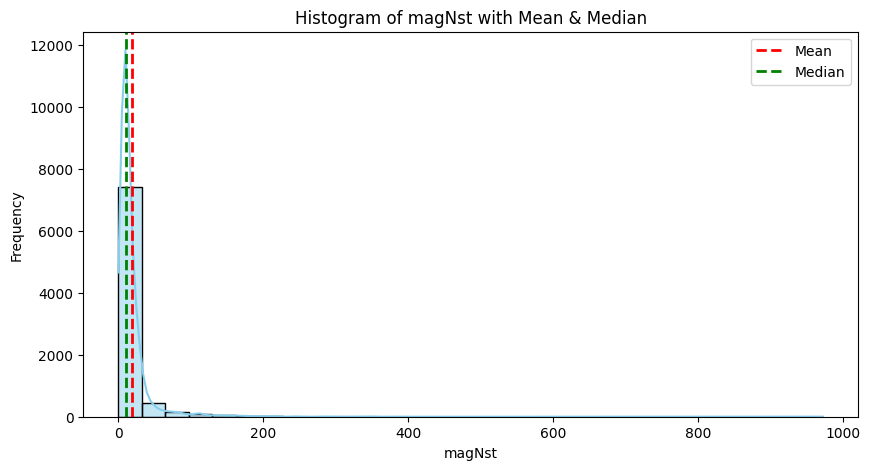

In [61]:
plt.figure(figsize=(12,8))

for col in numerical:
    plt.figure(figsize=(10,5))  # separate figure for each column
    sns.histplot(df[col], bins=30, color='skyblue', kde=True)
    
    # Add mean and median lines
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    
    # Titles and labels
    plt.title(f'Histogram of {col} with Mean & Median')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

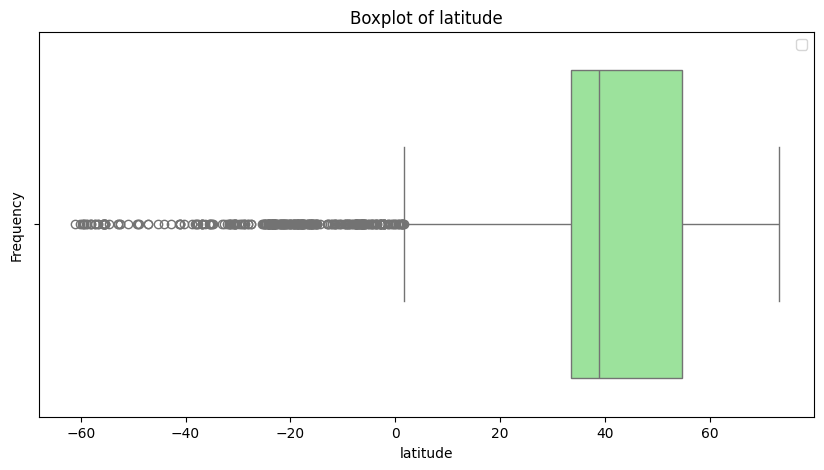

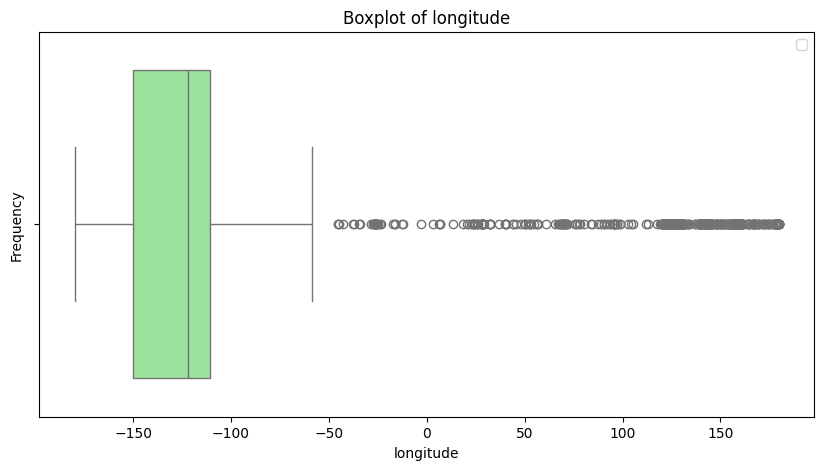

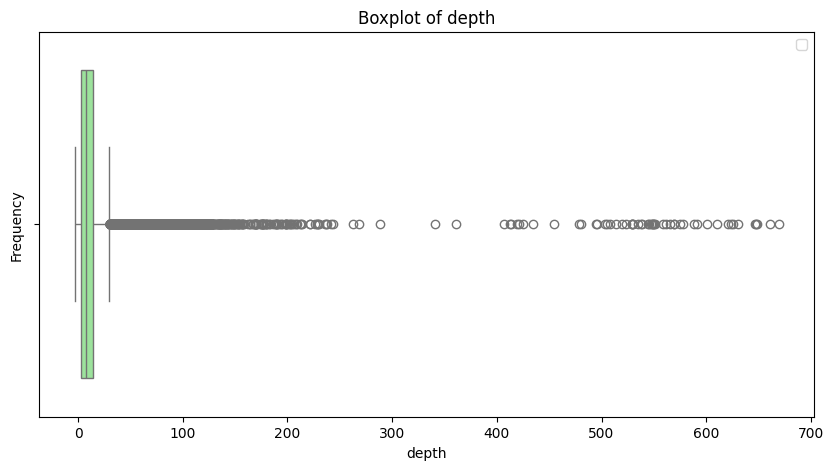

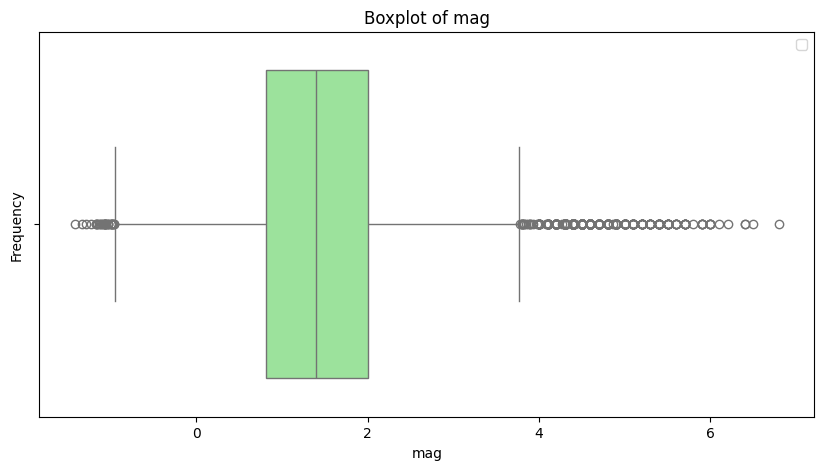

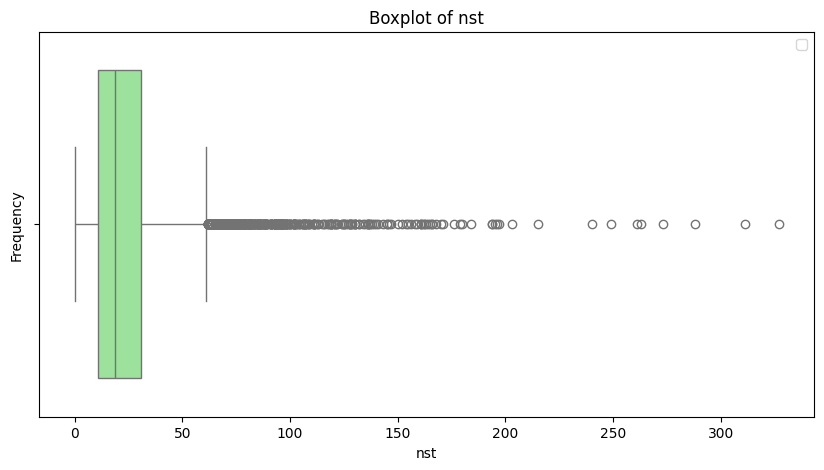

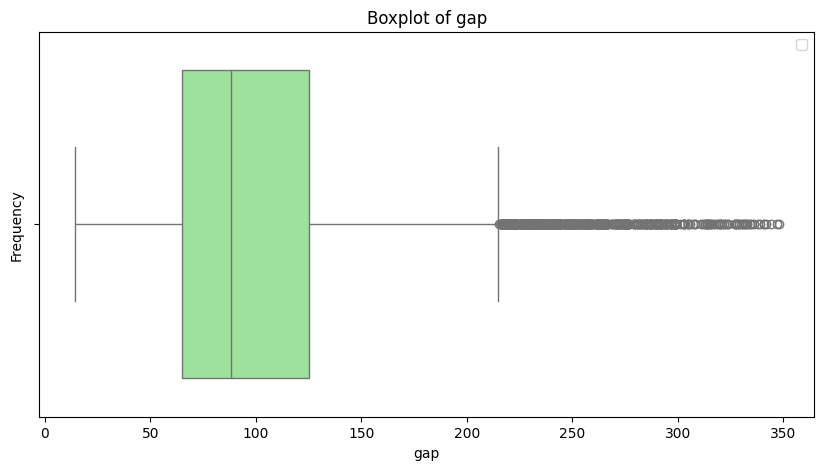

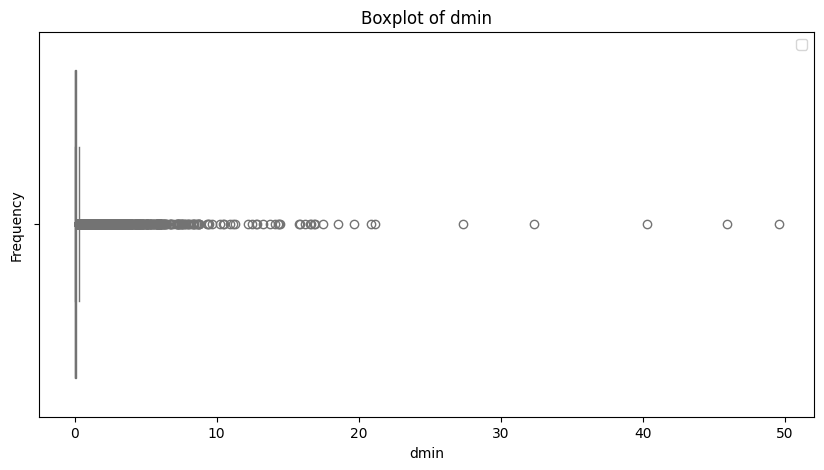

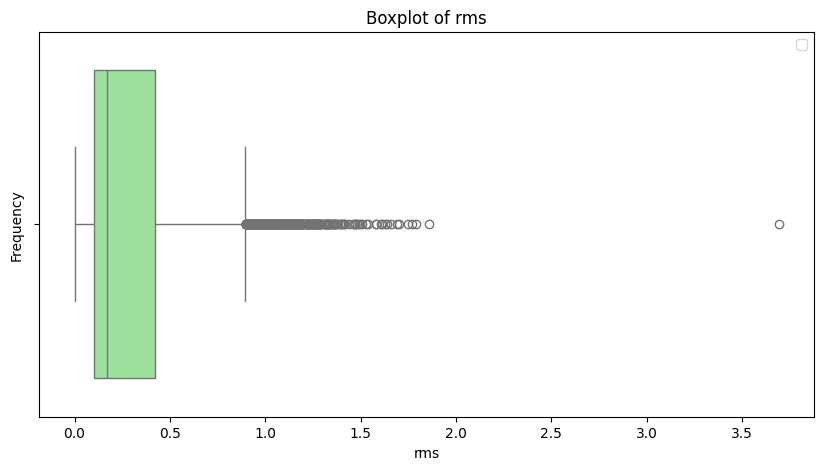

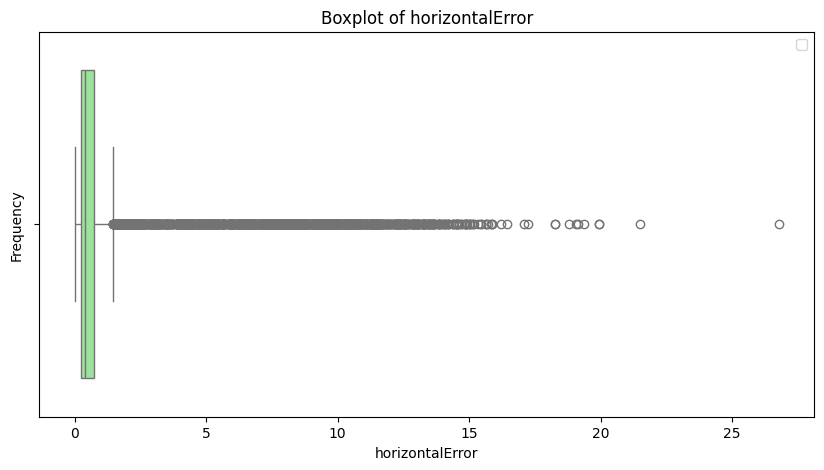

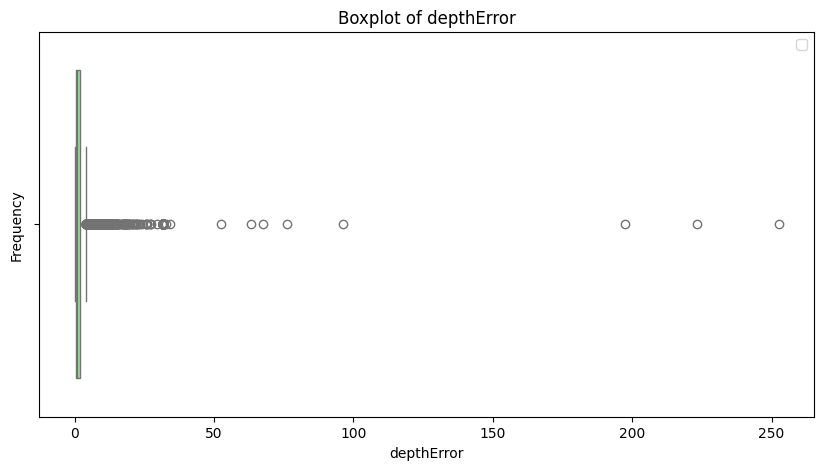

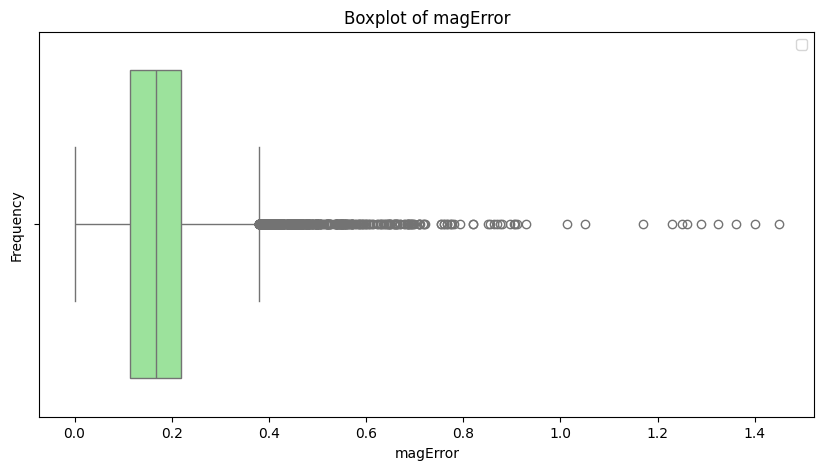

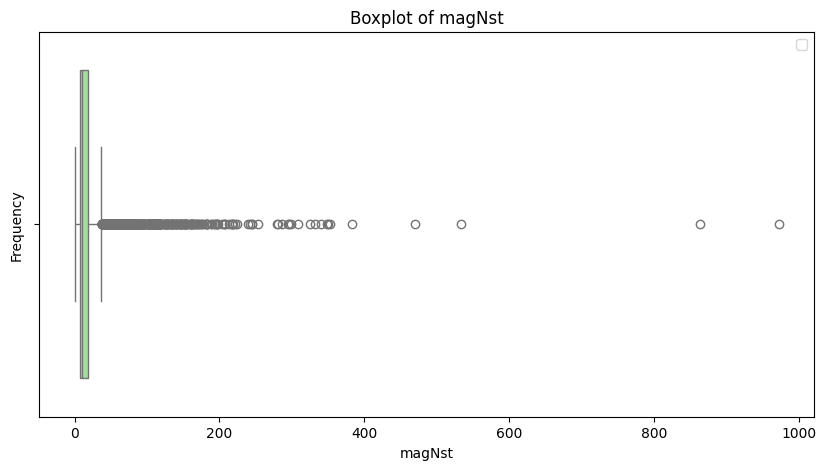

In [62]:
for col in numerical:
    plt.figure(figsize=(10,5))  # separate figure for each column
    sns.boxplot(x=df[col],color='lightgreen')
     # Titles and labels
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

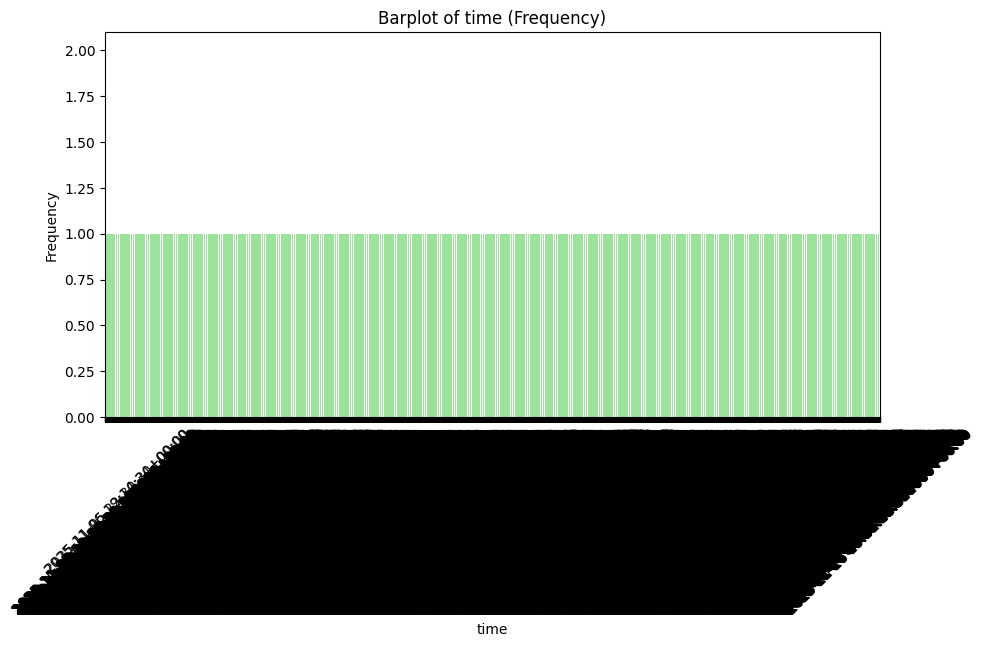

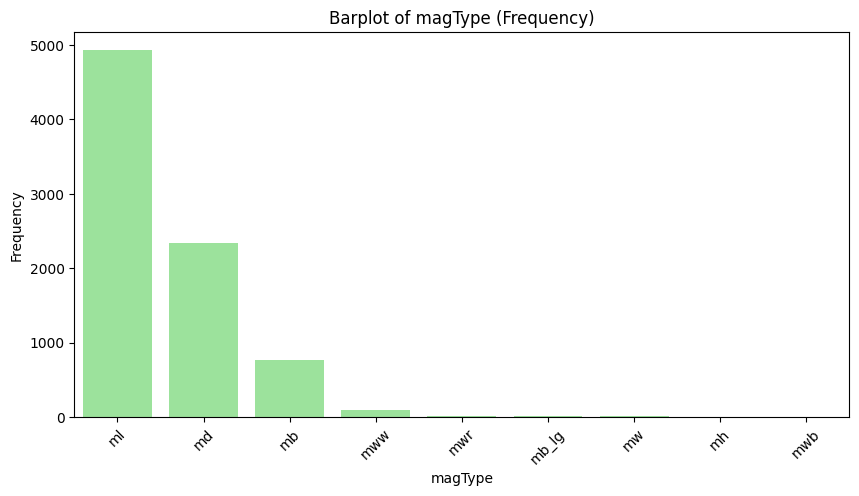

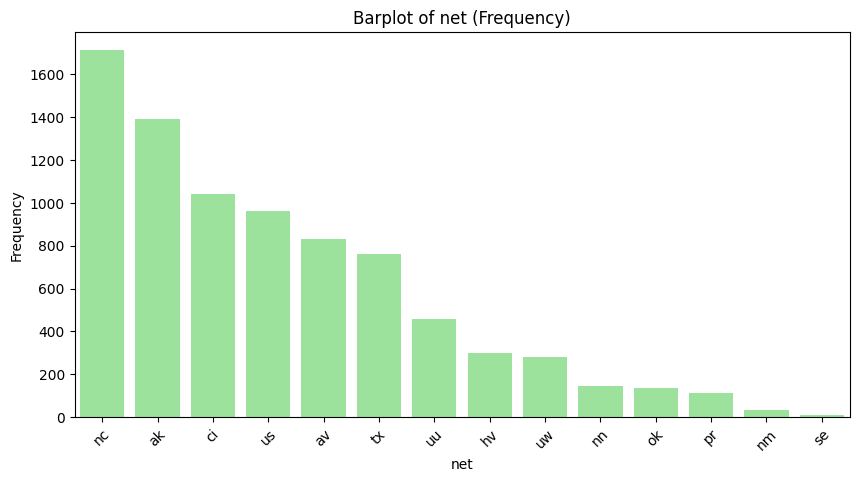

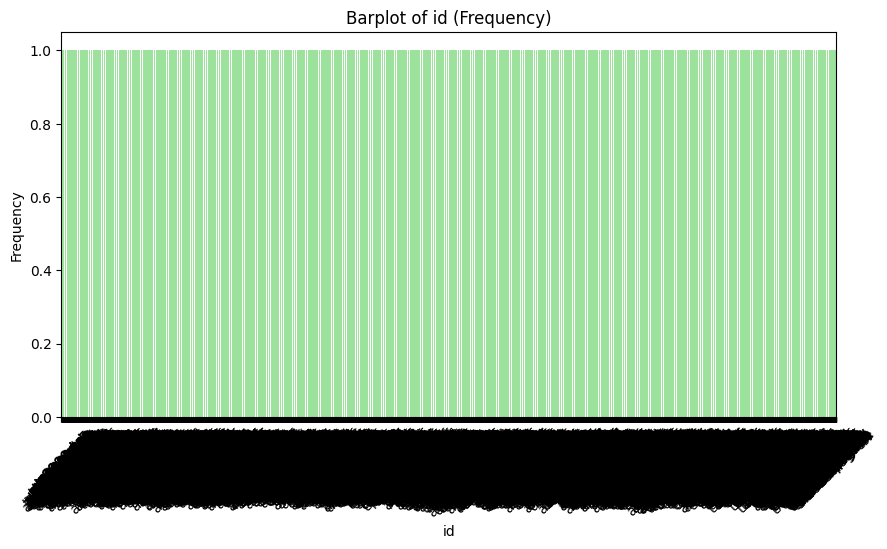

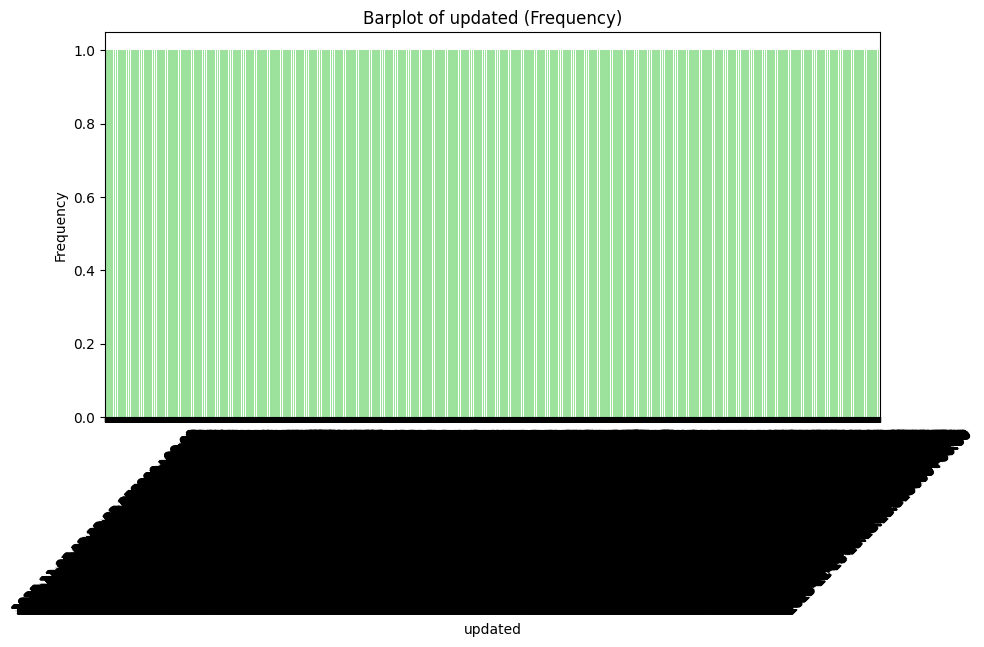

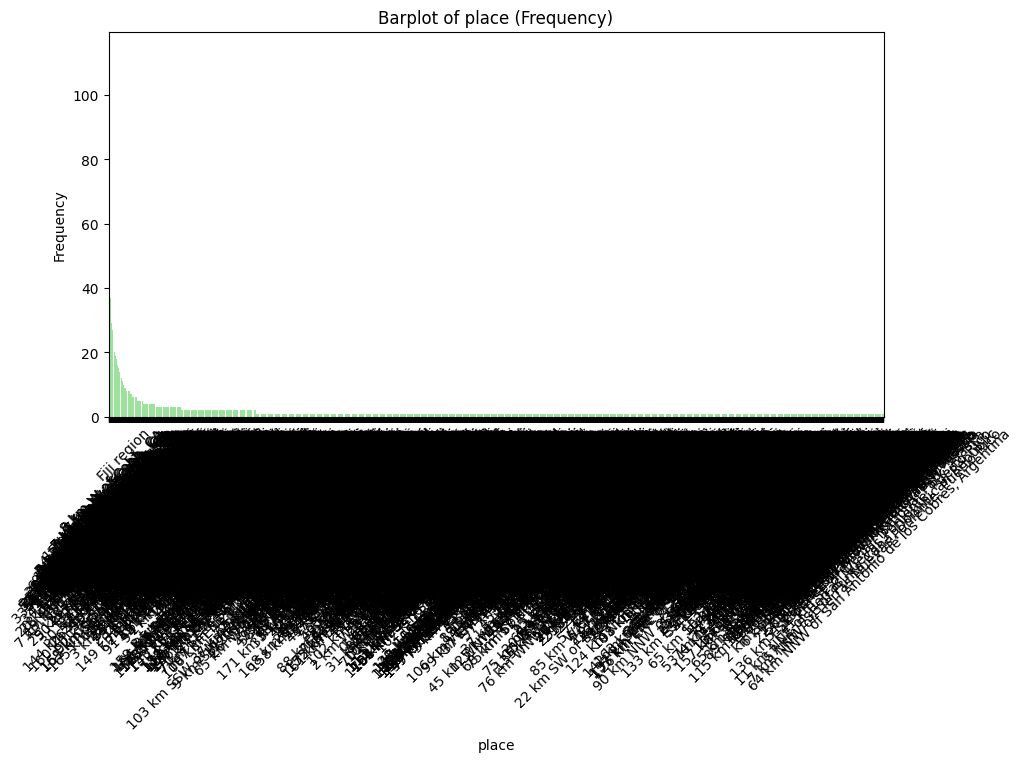

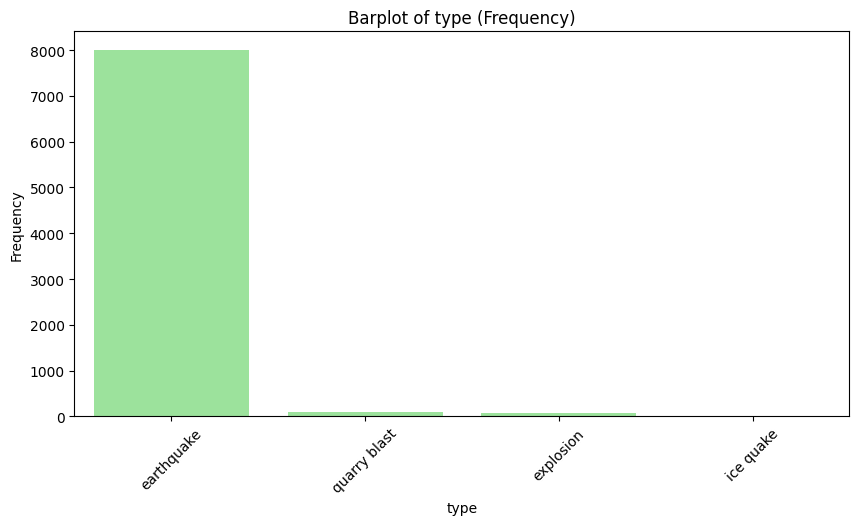

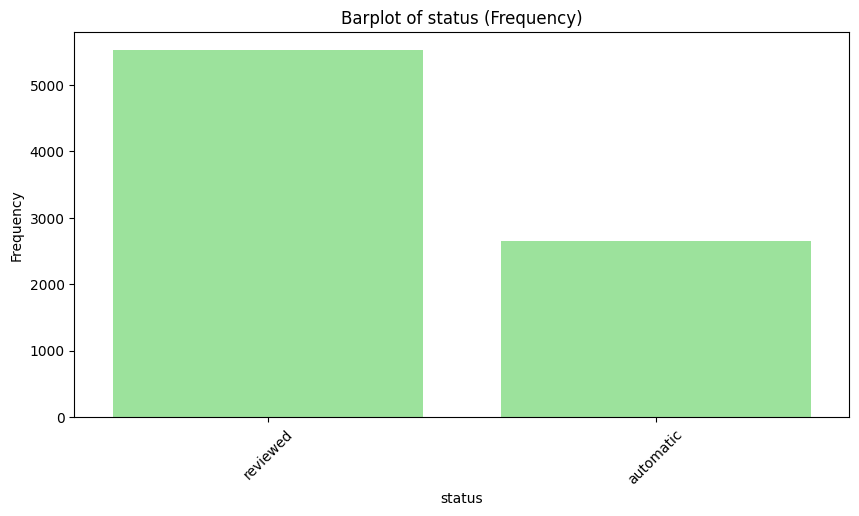

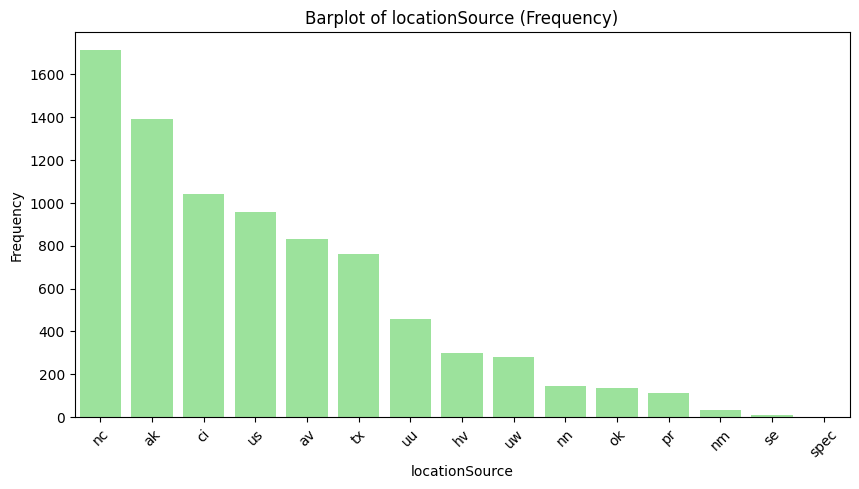

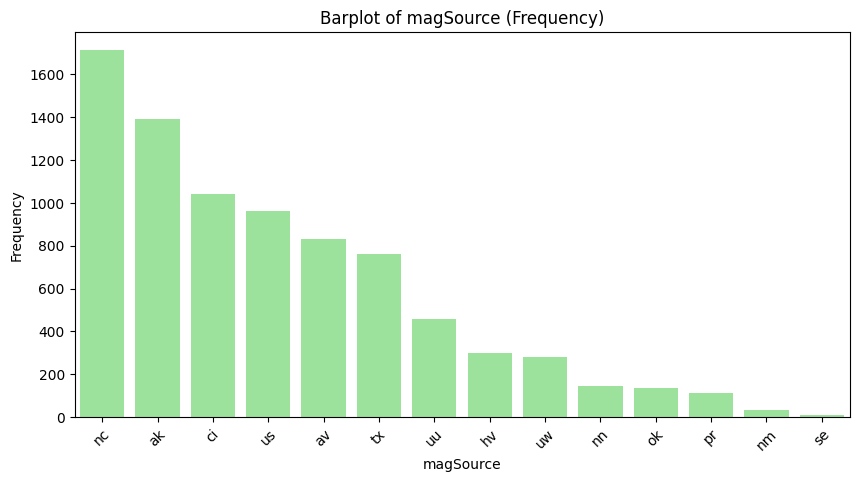

In [ ]:
#Categorical 

for col in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df,color='lightgreen', order=df[col].value_counts().index) #order=df[col].value_counts().index → shows categories in descending frequency order.
    plt.title(f'Barplot of {col} (Frequency)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # rotate labels if needed
    plt.show()


### Bivariate Analysis